<a href="https://colab.research.google.com/github/mahdid-lilia/SIC_Samsung-Innovation-Campus-AI-Course/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install mnist # if you are working on colab otherwise install it directly from conda/python prompt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
import mnist

In [4]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [5]:
# Normalize the images. 
# The pixel value is a single number that represents the brightness of the pixel, typically zero is taken to be black, and 255 is taken to be #white. After normalization we will get values between 0 and 1
train_images = (train_images / 255) 
test_images = (test_images / 255) 

# Flatten the images.
train_images = train_images.reshape((-1, 784)) 
test_images = test_images.reshape((-1, 784))

In [6]:
# Build the model.
model = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax')])

In [7]:
# Compile K model.
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [8]:
history = model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=32,
  validation_data=(test_images, to_categorical(test_labels)))

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2725 - accuracy: 0.9210 - val_loss: 0.1401 - val_accuracy: 0.9586
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1188 - accuracy: 0.9645 - val_loss: 0.1086 - val_accuracy: 0.9662
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9738 - val_loss: 0.0965 - val_accuracy: 0.9705
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0677 - accuracy: 0.9788 - val_loss: 0.1034 - val_accuracy: 0.9692
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0570 - accuracy: 0.9819 - val_loss: 0.0954 - val_accuracy: 0.9713


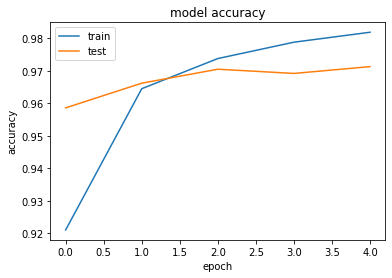

In [12]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
# Evaluate the model.
model.evaluate(
  test_images,
  to_categorical(test_labels))

313/313 [==============================] - 1s 2ms/step - loss: 0.0954 - accuracy: 0.9713


[0.09542108327150345, 0.9713000059127808]